## Trading Strategies and Simulation for BRK/B

In this notebook i analyse the different strategies and scenario ahead of BRK/B third quarter result.
The underlying has been under pressure from the market and the price could go to 220- 230 after the results.

We will consider few scenqrioes scenarios and



 ....



In [2]:
import numpy as np
import QuantLib as ql
import datetime
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt


def european_option(val,exp,str,vol,typ,und,r):


    opt_type = ql.Option.Put if typ=="Put" else ql.Option.Call
    ql.Settings.instance().evaluationDate = ql.Date(val.day,val.month, val.year)




    option = ql.EuropeanOption(ql.PlainVanillaPayoff(opt_type, str), ql.EuropeanExercise(ql.Date(exp.day,exp.month,exp.year)))
    u = ql.SimpleQuote(und)
    r = ql.SimpleQuote(r)
    sigma = ql.SimpleQuote(vol)


    riskFreeCurve = ql.FlatForward(0, ql.TARGET(), ql.QuoteHandle(r), ql.Actual360())
    volatility = ql.BlackConstantVol(0, ql.TARGET(), ql.QuoteHandle(sigma), ql.Actual360())
    process = ql.BlackScholesProcess(ql.QuoteHandle(u), ql.YieldTermStructureHandle(riskFreeCurve),
    ql.BlackVolTermStructureHandle(volatility))
    engine = ql.AnalyticEuropeanEngine(process)
    option.setPricingEngine(engine)
    output = {"Value Date": valuation_date,"Underlying":und, "Implied Vol": vol,'NPV': option.NPV(), 'delta':(option.delta()), 'gamma': (option.gamma()), 'vega': (option.vega()), 'theta': option.thetaPerDay()}

    return output

In [29]:
valuation_date = datetime.date(2021,1,19)
expiry_date = datetime.date(2021,12,30)
strike = 260
vol = 0.15
option_type = "Put"
underlying = 300
dict_1 = european_option(valuation_date,expiry_date,strike,vol,option_type,underlying,0.01)

In [28]:
dict_1

{'Value Date': datetime.date(2021, 1, 19),
 'Underlying': 300,
 'Implied Vol': 0.55,
 'NPV': 40.22274830214971,
 'delta': -0.2902042209214408,
 'gamma': 0.002119888887715322,
 'vega': 100.56222911099559,
 'theta': -0.07557300640613428}

In [2]:
# SPY
valuation_date = datetime.date(2020,12,22)
expiry_date = datetime.date(2021,6,18)
strike = 280

vol = 0.33
option_type = "Put"
underlying = 358.5
dict_2 = european_option(valuation_date,expiry_date,strike,vol,option_type,underlying,0.01)

In [3]:
dict_2

{'Value Date': datetime.date(2020, 12, 22),
 'Underlying': 358.5,
 'Implied Vol': 0.33,
 'NPV': 5.146957481241961,
 'delta': -0.11460864402828852,
 'gamma': 0.002327640467624443,
 'vega': 48.811894116375385,
 'theta': -0.04336046963494408}

In [16]:

# COIL
valuation_date = datetime.date(2020,12,18)
expiry_date = datetime.date(2020,12,23)
strike = 50

vol = 0.35
option_type = "Call"
underlying = 50
dict_3 = european_option(valuation_date,expiry_date,strike,vol,option_type,underlying,0.01)

In [17]:
dict_3

{'Value Date': datetime.date(2020, 12, 18),
 'Underlying': 50,
 'Implied Vol': 0.35,
 'NPV': 0.8261376669284937,
 'delta': 0.5095701552281329,
 'gamma': 0.19338076816699334,
 'vega': 2.3501135020294326,
 'theta': -0.0818026132233301}

In [10]:
 scenarios =  pd.read_csv("BRK-B-Trade-Data.csv")

datelist = pd.date_range(datetime.date.today(), periods=21)




scenarios.head()



,Date,sc1,Vol_Long_1,Vol_Short_1,sc2,Vol_Long_2,Vol_Short_2,sc3,Vol_Long_3,Vol_Short_3,sc4,Vol_Long_4,Vol_Short_4
0,10/20,205,20,25,205,20,25,205,20,25,205,20,25
1,10/21,205,20,25,210,20,25,210,20,25,205,20,25
2,10/22,200,20,25,210,20,25,210,20,25,210,20,25
3,10/23,200,20,25,210,20,25,210,20,25,210,20,25
4,10/24,200,20,25,212,20,25,212,21,25,211,20,25


Scenario 1: Bad results, contested election risk off vol a bit higher but underlying hammered.

/Users/ramzisaouma/opt/anaconda3/envs/CO6_analysis/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/Users/ramzisaouma/opt/anaconda3/envs/CO6_analysis/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


NameError: name 'dict_1' is not defined

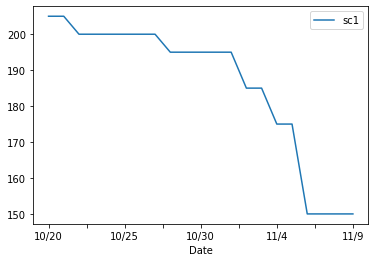

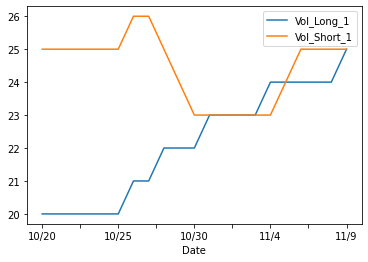

In [11]:
sc1 = scenarios[['Date','sc1','Vol_Long_1',"Vol_Short_1"]]
ax =  sc1.plot('Date','sc1')
ax1 =  sc1.plot('Date',['Vol_Long_1',"Vol_Short_1"])


output = pd.DataFrame(columns=[list(dict_1.keys())])
valuation_date = datetime.date(2020,10,20)
expiry_date = datetime.date(2021,6,18)
strike = 250
vol = 0.20
option_type = "Call"
underlying = 210

for u, v ,d in zip(sc1['sc1'],sc1['Vol_Long_1'],datelist):
    v=v/100
    long_dated = european_option(d,expiry_date,strike,v,option_type,u,0.01)

    v_list = (list(long_dated.values()))
    df_len = len(output)
    output.loc[df_len] = v_list



output

<Figure size 432x288 with 0 Axes>

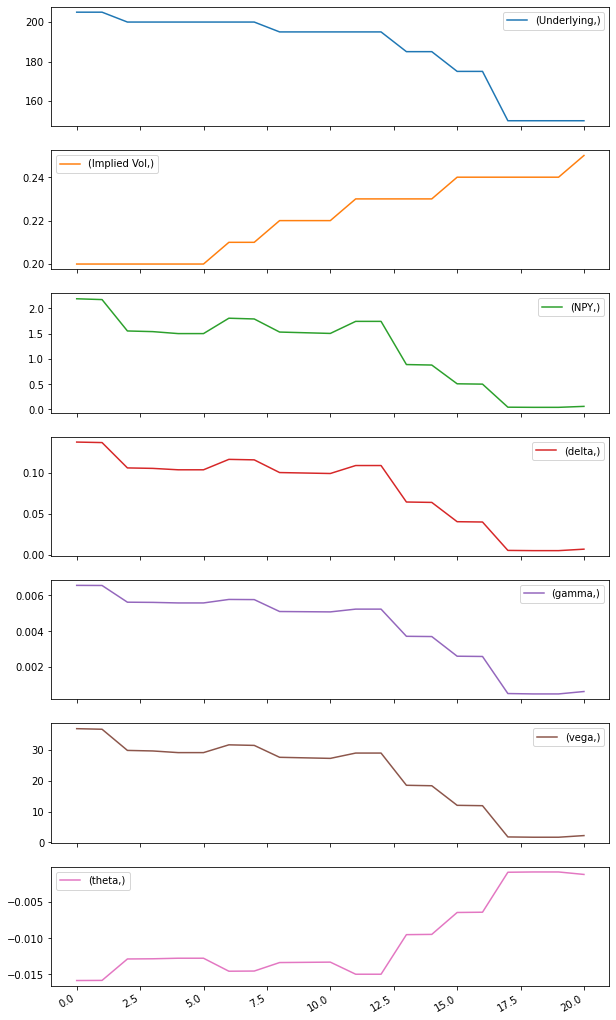

In [31]:
output.to_csv('Output_Sc1_Long.csv')
plt.figure()
out = output.plot.line( subplots=True, figsize= (10,20))

plt.savefig("sc1_long.png")


In [21]:
output = pd.DataFrame(columns=[list(dict_1.keys())])
valuation_date = datetime.date(2020,10,20)
expiry_date = datetime.date(2020,11,6)
strike = 220
vol = 0.20
option_type = "Call"
underlying = 210

for u, v ,d in zip(sc1['sc1'],sc1['Vol_Short_1'],datelist):
    v=v/100
    long_dated = european_option(d,expiry_date,strike,v,option_type,u,0.01)

    v_list = (list(long_dated.values()))
    df_len = len(output)
    output.loc[df_len] = v_list



output

,Value Date,Underlying,Implied Vol,NPY,delta,gamma,vega,theta
0,2020-10-20,205,0.25,5.349353e-01,1.031126e-01,1.611389e-02,7.994561e+00,-5.854275e-02
1,2020-10-20,205,0.25,4.762319e-01,9.593126e-02,1.575614e-02,7.357241e+00,-5.721682e-02
2,2020-10-20,200,0.25,1.313013e-01,3.332626e-02,7.271949e-03,3.029979e+00,-2.508295e-02
3,2020-10-20,200,0.25,1.069562e-01,2.867034e-02,6.645750e-03,2.584458e+00,-2.291359e-02
4,2020-10-20,200,0.25,4.820657e-02,1.569276e-02,4.504255e-03,1.376300e+00,-1.551020e-02
5,2020-10-20,200,0.25,4.820657e-02,1.569276e-02,4.504255e-03,1.376300e+00,-1.551020e-02
6,2020-10-20,200,0.26,6.329890e-02,1.933596e-02,5.176176e-03,1.644874e+00,-1.927734e-02
7,2020-10-20,200,0.26,4.529192e-02,1.495090e-02,4.357367e-03,1.258795e+00,-1.622085e-02
8,2020-10-20,195,0.25,2.662486e-03,1.240764e-03,5.323095e-04,1.265067e-01,-1.739524e-03
9,2020-10-20,195,0.24,7.339353e-04,4.076392e-04,2.108102e-04,4.275230e-02,-6.346575e-04


<Figure size 432x288 with 0 Axes>

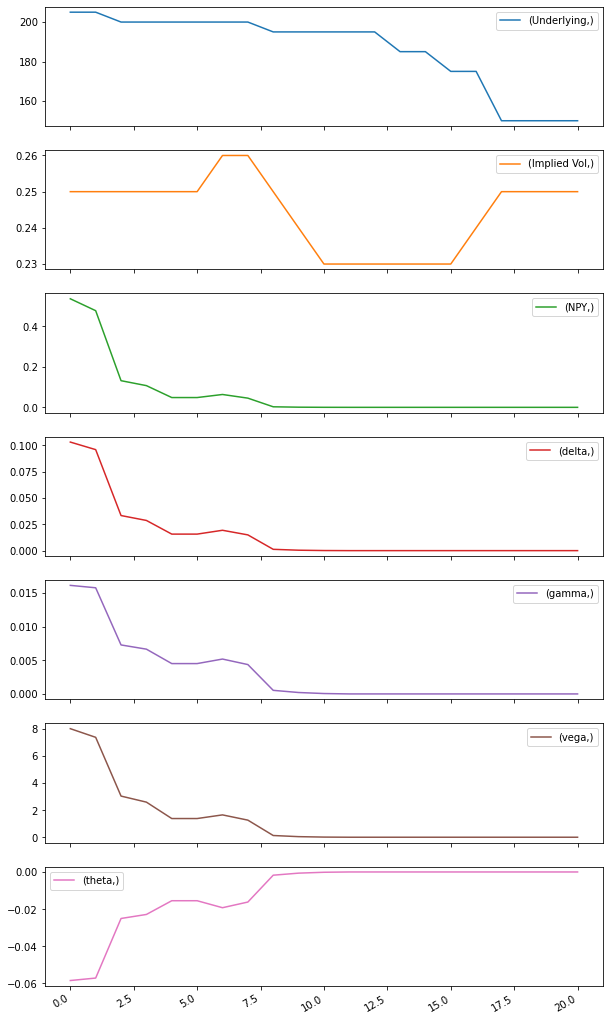

In [22]:

output.to_csv('Output_Sc1_Short.csv')
plt.figure()
out = output.plot.line( subplots=True, figsize= (10,20))

plt.savefig("sc1_short.png")

Scenario 2: Good results, Clear cut election risk on vol a bit higher but underlying spikes up

/Users/ramzisaouma/opt/anaconda3/envs/CO6_analysis/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/Users/ramzisaouma/opt/anaconda3/envs/CO6_analysis/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


,Value Date,Underlying,Implied Vol,NPY,delta,gamma,vega,theta
0,2020-10-20,205,0.20,2.189069,0.137855,0.006566,36.942470,-0.015833
1,2020-10-20,210,0.20,2.944979,0.172274,0.007442,43.759918,-0.018894
2,2020-10-20,210,0.20,2.925827,0.171640,0.007440,43.565998,-0.018886
3,2020-10-20,210,0.20,2.906683,0.171004,0.007438,43.371689,-0.018878
4,2020-10-20,212,0.20,3.202558,0.184289,0.007773,45.611632,-0.020126
5,2020-10-20,212,0.20,3.202558,0.184289,0.007773,45.611632,-0.020126
6,2020-10-20,214,0.21,4.081048,0.213861,0.008022,50.364111,-0.023337
7,2020-10-20,214,0.21,4.057384,0.213216,0.008025,50.168361,-0.023342
8,2020-10-20,215,0.21,4.250320,0.220665,0.008166,51.303303,-0.023986
9,2020-10-20,215,0.21,4.225997,0.220017,0.008170,51.106890,-0.023994


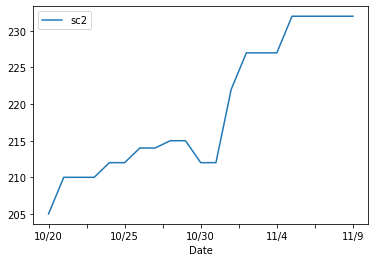

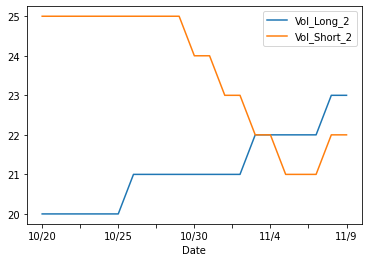

In [27]:
sc2 = scenarios[['Date','sc2','Vol_Long_2',"Vol_Short_2"]]
ax =  sc2.plot('Date','sc2')
ax1 =  sc2.plot('Date',['Vol_Long_2',"Vol_Short_2"])

output = pd.DataFrame(columns=[list(dict_1.keys())])
valuation_date = datetime.date(2020,10,20)
expiry_date = datetime.date(2021,6,18)
strike = 250
vol = 0.20
option_type = "Call"
underlying = 210

for u, v ,d in zip(sc2['sc2'],sc2['Vol_Long_2'],datelist):
    v=v/100
    long_dated = european_option(d,expiry_date,strike,v,option_type,u,0.01)

    v_list = (list(long_dated.values()))
    df_len = len(output)
    output.loc[df_len] = v_list



output

<Figure size 432x288 with 0 Axes>

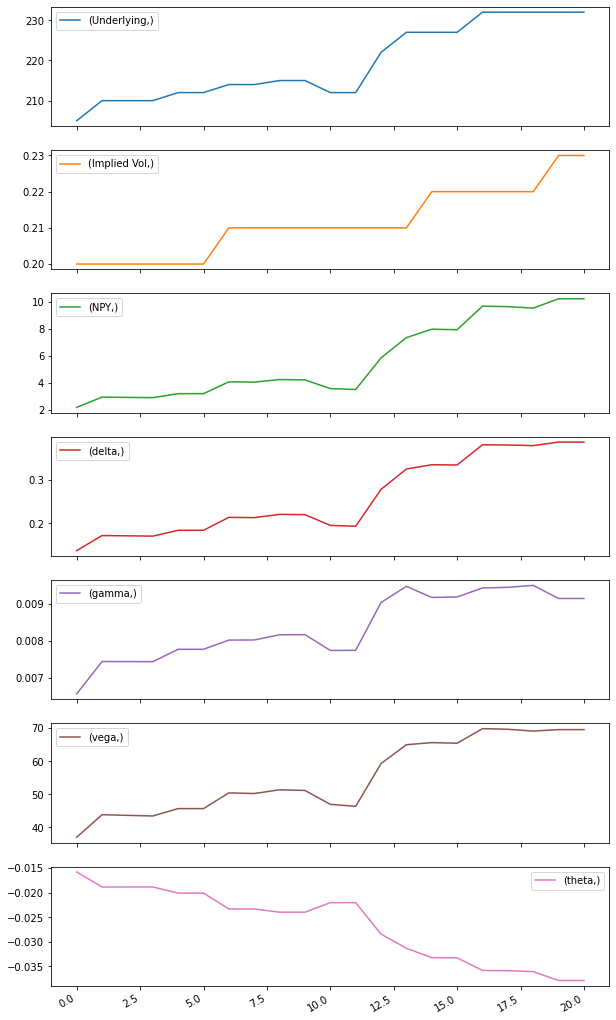

In [29]:
output.to_csv('Output_Sc2_Long.csv')
plt.figure()
out = output.plot.line( subplots=True, figsize= (10,20))

plt.savefig("sc2_long.png")


In [34]:
output = pd.DataFrame(columns=[list(dict_1.keys())])
valuation_date = datetime.date(2020,10,20)
expiry_date = datetime.date(2020,11,6)
strike = 220
vol = 0.20
option_type = "Call"
underlying = 210

for u, v ,d in zip(sc2['sc2'],sc2['Vol_Short_2'],datelist):
    v=v/100
    long_dated = european_option(d,expiry_date,strike,v,option_type,u,0.01)

    v_list = (list(long_dated.values()))
    df_len = len(output)
    output.loc[df_len] = v_list



output

,Value Date,Underlying,Implied Vol,NPY,delta,gamma,vega,theta
0,2020-10-20,205,0.25,0.534935,0.103113,0.016114,7.994561,-0.058543
1,2020-10-20,210,0.25,1.191969,0.198255,0.025162,12.329188,-0.096110
2,2020-10-20,210,0.25,1.094230,0.189993,0.025322,11.632101,-0.096669
3,2020-10-20,210,0.25,0.995993,0.181132,0.025445,10.909465,-0.097086
4,2020-10-20,212,0.25,1.055164,0.206457,0.030797,10.573443,-0.119677
5,2020-10-20,212,0.25,1.055164,0.206457,0.030797,10.573443,-0.119677
6,2020-10-20,214,0.25,1.532986,0.272952,0.035548,12.435796,-0.140938
7,2020-10-20,214,0.25,1.388154,0.262344,0.036546,11.622502,-0.144791
8,2020-10-20,215,0.25,1.508901,0.289275,0.040230,11.622778,-0.160879
9,2020-10-20,215,0.25,1.342760,0.276833,0.041780,10.729236,-0.166942


<Figure size 432x288 with 0 Axes>

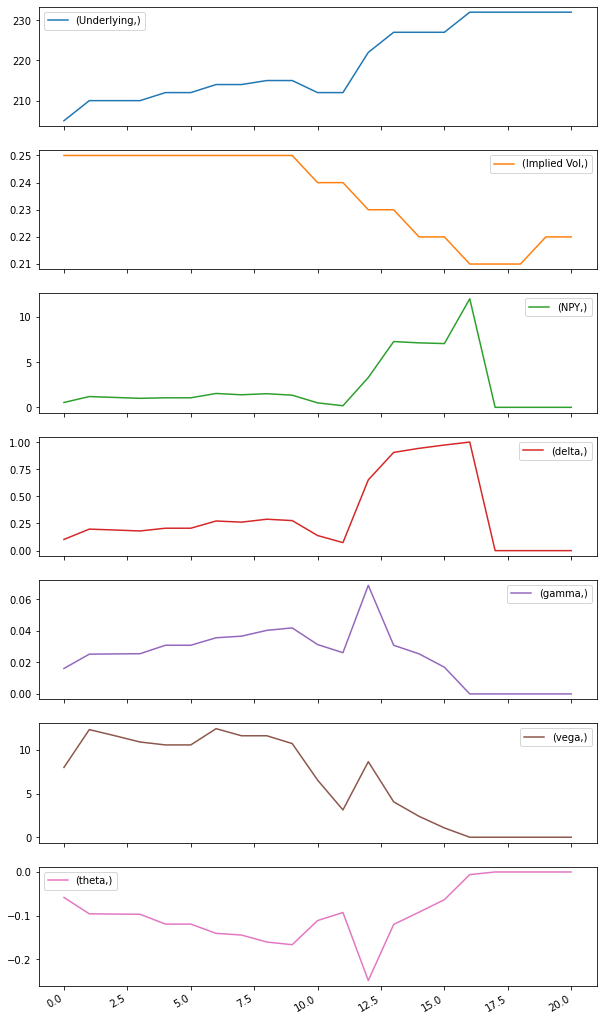

In [36]:

output.to_csv('Output_Sc2_Short.csv')
plt.figure()
out = output.plot.line( subplots=True, figsize= (10,20))

plt.savefig("sc2_short.png")

Scenario 3: good results, contested election risk off vol a bit higher but underlying sell-off after the good recovers

/Users/ramzisaouma/opt/anaconda3/envs/CO6_analysis/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/Users/ramzisaouma/opt/anaconda3/envs/CO6_analysis/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


,Value Date,Underlying,Implied Vol,NPY,delta,gamma,vega,theta
0,2020-10-20,205,0.20,2.189069,0.137855,0.006566,36.942470,-0.015833
1,2020-10-20,210,0.20,2.944979,0.172274,0.007442,43.759918,-0.018894
2,2020-10-20,210,0.20,2.925827,0.171640,0.007440,43.565998,-0.018886
3,2020-10-20,210,0.20,2.906683,0.171004,0.007438,43.371689,-0.018878
4,2020-10-20,212,0.21,3.669184,0.198098,0.007739,47.677837,-0.022061
5,2020-10-20,212,0.20,3.202558,0.184289,0.007773,45.611632,-0.020126
6,2020-10-20,212,0.20,3.202558,0.184289,0.007773,45.611632,-0.020126
7,2020-10-20,212,0.21,3.646816,0.197448,0.007740,47.481924,-0.022061
8,2020-10-20,210,0.21,3.246140,0.181615,0.007438,44.580101,-0.020771
9,2020-10-20,210,0.21,3.225083,0.180960,0.007437,44.383778,-0.020765


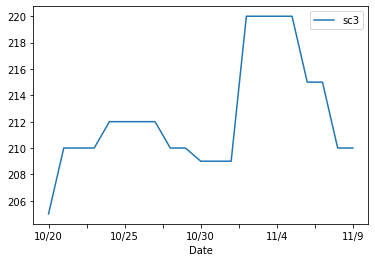

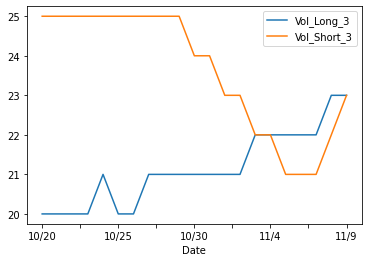

In [37]:
sc3 = scenarios[['Date','sc3','Vol_Long_3',"Vol_Short_3"]]
ax =  sc3.plot('Date','sc3')
ax1 =  sc3.plot('Date',['Vol_Long_3',"Vol_Short_3"])

output = pd.DataFrame(columns=[list(dict_1.keys())])
valuation_date = datetime.date(2020,10,20)
expiry_date = datetime.date(2021,6,18)
strike = 250
vol = 0.20
option_type = "Call"
underlying = 210

for u, v ,d in zip(sc3['sc3'],sc3['Vol_Long_3'],datelist):
    v=v/100
    long_dated = european_option(d,expiry_date,strike,v,option_type,u,0.01)

    v_list = (list(long_dated.values()))
    df_len = len(output)
    output.loc[df_len] = v_list



output

<Figure size 432x288 with 0 Axes>

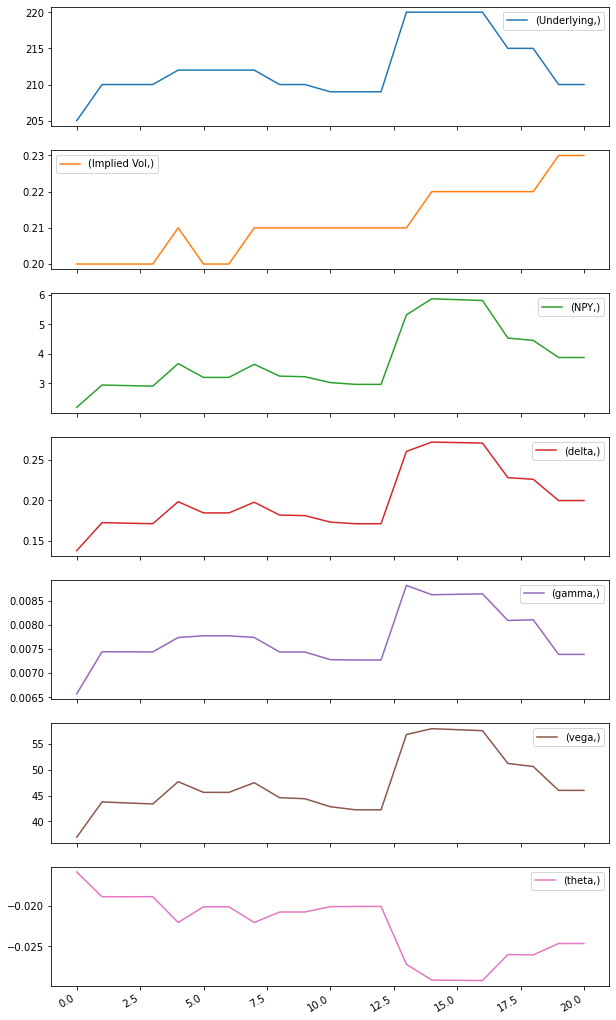

In [38]:
output.to_csv('Output_Sc3_Long.csv')
plt.figure()
out = output.plot.line( subplots=True, figsize= (10,20))

plt.savefig("sc3_long.png")


In [39]:
output = pd.DataFrame(columns=[list(dict_1.keys())])
valuation_date = datetime.date(2020,10,20)
expiry_date = datetime.date(2020,11,6)
strike = 220
vol = 0.20
option_type = "Call"
underlying = 210

for u, v ,d in zip(sc3['sc3'],sc3['Vol_Short_3'],datelist):
    v=v/100
    long_dated = european_option(d,expiry_date,strike,v,option_type,u,0.01)

    v_list = (list(long_dated.values()))
    df_len = len(output)
    output.loc[df_len] = v_list



output

,Value Date,Underlying,Implied Vol,NPY,delta,gamma,vega,theta
0,2020-10-20,205,0.25,0.534935,0.103113,0.016114,7.994561,-0.058543
1,2020-10-20,210,0.25,1.191969,0.198255,0.025162,12.329188,-0.096110
2,2020-10-20,210,0.25,1.094230,0.189993,0.025322,11.632101,-0.096669
3,2020-10-20,210,0.25,0.995993,0.181132,0.025445,10.909465,-0.097086
4,2020-10-20,212,0.25,1.055164,0.206457,0.030797,10.573443,-0.119677
5,2020-10-20,212,0.25,1.055164,0.206457,0.030797,10.573443,-0.119677
6,2020-10-20,212,0.25,1.055164,0.206457,0.030797,10.573443,-0.119677
7,2020-10-20,212,0.25,0.933125,0.194484,0.031162,9.726025,-0.121014
8,2020-10-20,210,0.25,0.506052,0.124910,0.024786,6.831719,-0.094290
9,2020-10-20,210,0.25,0.411687,0.110539,0.024111,5.907119,-0.091659


<Figure size 432x288 with 0 Axes>

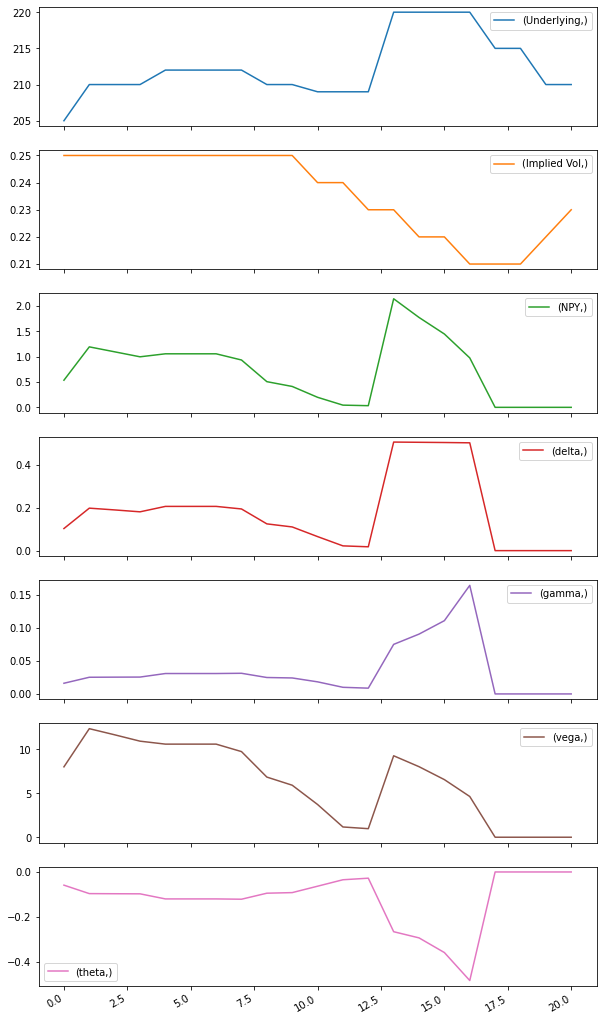

In [40]:

output.to_csv('Output_Sc3_Short.csv')
plt.figure()
out = output.plot.line( subplots=True, figsize= (10,20))

plt.savefig("sc3_short.png")

In [ ]:

Scenario 4: bad results, Clear cut election risk on vol a bit higher but recovers after a short sell-off

/Users/ramzisaouma/opt/anaconda3/envs/CO6_analysis/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/Users/ramzisaouma/opt/anaconda3/envs/CO6_analysis/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


,Value Date,Underlying,Implied Vol,NPY,delta,gamma,vega,theta
0,2020-10-20,205,0.20,2.189069,0.137855,0.006566,36.942470,-0.015833
1,2020-10-20,205,0.20,2.173025,0.137244,0.006559,36.754110,-0.015816
2,2020-10-20,210,0.20,2.925827,0.171640,0.007440,43.565998,-0.018886
3,2020-10-20,210,0.20,2.906683,0.171004,0.007438,43.371689,-0.018878
4,2020-10-20,211,0.20,3.022127,0.176600,0.007604,44.198795,-0.019488
5,2020-10-20,211,0.20,3.022127,0.176600,0.007604,44.198795,-0.019488
6,2020-10-20,212,0.20,3.202558,0.184289,0.007773,45.611632,-0.020126
7,2020-10-20,210,0.20,2.830191,0.168437,0.007429,42.590530,-0.018843
8,2020-10-20,210,0.20,2.811091,0.167790,0.007427,42.394255,-0.018834
9,2020-10-20,210,0.19,2.381872,0.152780,0.007369,39.789321,-0.016884


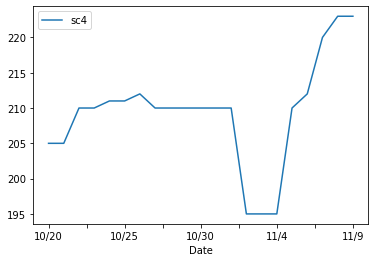

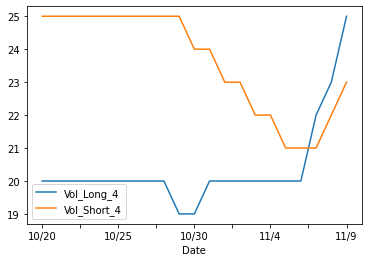

In [41]:
sc4 = scenarios[['Date','sc4','Vol_Long_4',"Vol_Short_4"]]
ax =  sc4.plot('Date','sc4')
ax1 =  sc4.plot('Date',['Vol_Long_4',"Vol_Short_4"])

output = pd.DataFrame(columns=[list(dict_1.keys())])
valuation_date = datetime.date(2020,10,20)
expiry_date = datetime.date(2021,6,18)
strike = 250
vol = 0.20
option_type = "Call"
underlying = 210

for u, v ,d in zip(sc4['sc4'],sc4['Vol_Long_4'],datelist):
    v=v/100
    long_dated = european_option(d,expiry_date,strike,v,option_type,u,0.01)

    v_list = (list(long_dated.values()))
    df_len = len(output)
    output.loc[df_len] = v_list



output

<Figure size 432x288 with 0 Axes>

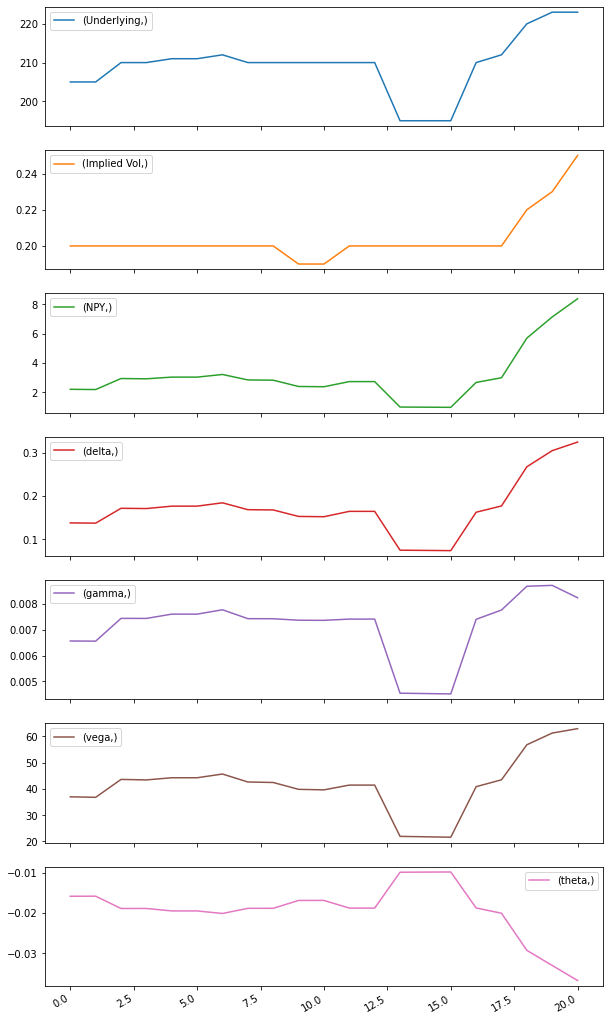

In [42]:
output.to_csv('Output_Sc4_Long.csv')
plt.figure()
out = output.plot.line( subplots=True, figsize= (10,20))

plt.savefig("sc4_long.png")


In [49]:
output = pd.DataFrame(columns=[list(dict_1.keys())])
valuation_date = datetime.date(2020,10,20)
expiry_date = datetime.date(2020,11,6)
strike = 220
vol = 0.20
option_type = "Call"
underlying = 210

for u, v ,d in zip(sc4['sc4'],sc4['Vol_Short_4'],datelist):
    v=v/100
    long_dated = european_option(d,expiry_date,strike,v,option_type,u,0.01)

    v_list = (list(long_dated.values()))
    df_len = len(output)
    output.loc[df_len] = v_list



output

NameError: name 'dict_1' is not defined

In [ ]:

output.to_csv('Output_Sc4_Short.csv')
plt.figure()
out = output.plot.line( subplots=True, figsize= (10,20))

plt.savefig("sc4_short.png")

In [22]:
list(range(38,48))

[38, 39, 40, 41, 42, 43, 44, 45, 46, 47]

In [ ]:
strikes = [35,36,37,38,39,40,41,42,43,44,45,46]
underlyings = [38,39,40,41,39,40,41,42,43,44,45,45.75]
strikes_t =  map(str,strikes)
col_names = (list(strikes_t))
output = pd.DataFrame(columns=col_names)
output['underlying'] = underlyings

output


In [20]:
spt =[]
print(type(spt))
valuation_date = datetime.date(2020,11,27)
expiry_date = datetime.date(2021,2,23)
vol = 0.47
option_type = "Put"
underlying = 47.88
vols = [0.535,0.52,0.51,0.495,0.495,0.49,0.48,0.47,0.475,0.47,0.45,0.44]
for k in range(12):
    strike = strikes[k]
    vol =vols[k]
    valuation = european_option(valuation_date,expiry_date,strike,vol,option_type,underlying,0.01)
    value = (valuation['NPV'])
    spt = spt + [value]
spt


<class 'list'>


[0.610798617711564,
 0.7010125650080995,
 0.8263778135105364,
 0.9424869433117705,
 1.1601522486151878,
 1.3774973894950002,
 1.5880118950434192,
 1.8232159621721091,
 2.2040496411091515,
 2.54274862479585,
 2.7842563943021488,
 3.141664239618442]

In [30]:
valuation_date = datetime.date(2020,12,5
                               )
expiry_date = datetime.date(2020,12,23)
strike = 45

vol = 0.48
option_type = "Put"
underlying = 43
dict_3 = european_option(valuation_date,expiry_date,strike,vol,option_type,underlying,0.01)

In [31]:
dict_3

{'Value Date': datetime.date(2020, 12, 5),
 'Underlying': 43,
 'Implied Vol': 0.48,
 'NPV': 2.937760730281066,
 'delta': -0.6533113731393915,
 'gamma': 0.08482723540264296,
 'vega': 3.346038576202387,
 'theta': -0.04865289538010984}

In [21]:
valuation_date = datetime.date(2020,12,5)
expiry_date = datetime.date(2021,2,23)
vol = 0.49
option_type = "Put"
for i in range(12):
    strike = (strikes[i])
    for j in range(12):
        underlying = (underlyings[j])
        valuation = european_option(valuation_date,expiry_date,strike,vol,option_type,underlying,0.01)
        output[str(strike)].iloc[j] = valuation['NPV']




/Users/ramzisaouma/opt/anaconda3/envs/CO6_analysis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [48]:
output = output.set_index('underlying')
output

,35,36,37,38,39,40,41,42,43,44,45,46
underlying,,,,,,,,,,,,
35.00,2.08317,2.64729,3.28239,3.98239,4.73999,5.54736,6.39667,7.28054,8.19226,9.126,10.0769,11.0408
36.00,1.65275,2.14269,2.70579,3.33807,4.0338,4.78616,5.58776,6.43117,7.30933,8.21577,9.14481,10.0916
37.00,1.29315,1.71125,2.20221,2.76436,3.39394,4.08561,4.83294,5.62896,6.46664,7.33919,8.2404,9.16472
38.00,0.998144,1.34883,1.76982,2.26173,2.82297,3.44999,4.13778,4.88028,5.67093,6.50302,7.37008,8.26611
39.00,0.760352,1.04959,1.40472,1.82843,2.32125,2.88162,3.50621,4.19029,4.92816,5.71361,6.54027,7.40195
40.00,0.571885,0.806597,1.10143,1.46078,1.88709,2.38077,2.94032,3.56259,4.24312,4.97654,5.75697,6.57835
41.00,0.424902,0.612417,0.853446,1.15363,1.51701,1.94579,2.44029,2.99906,3.61912,4.29625,5.02539,5.80097
42.00,0.312018,0.459607,0.653747,0.900859,1.20617,1.5734,2.00453,2.49981,3.05784,3.67578,4.34966,5.07469
43.00,0.226574,0.341097,0.495263,0.695829,0.948801,1.25903,1.62993,2.0633,2.55933,3.11664,3.73257,4.40333


In [49]:
output_pnl = output.copy()

In [50]:
for l in range(12):
     output_pnl.iloc[l]  = (output.iloc[l] - spt)/spt


In [51]:
output_pnl

,35,36,37,38,39,40,41,42,43,44,45,46
underlying,,,,,,,,,,,,
35.00,2.72829,2.88313,3.43464,3.43888,3.38963,3.29707,3.08865,2.87914,2.67358,2.38102,2.32858,2.17974
36.00,1.95795,2.14298,2.65563,2.7207,2.73564,2.70744,2.57161,2.42659,2.27766,2.0438,2.02071,1.90638
37.00,1.31437,1.51013,1.97527,2.08122,2.14308,2.16478,2.08914,1.99917,1.89978,1.71904,1.72196,1.63944
38.00,0.786397,0.978517,1.39109,1.52098,1.61431,1.67242,1.6448,1.60026,1.54296,1.40925,1.43448,1.38064
39.00,0.360816,0.539577,0.897825,1.03802,1.14967,1.23215,1.24112,1.23263,1.20989,1.11679,1.16038,1.13176
40.00,0.0235136,0.183146,0.488073,0.628222,0.747603,0.844181,0.879408,0.898184,0.902705,0.84372,0.901638,0.894564
41.00,-0.239545,-0.101685,0.153038,0.285867,0.40488,0.507238,0.559794,0.597929,0.622888,0.591684,0.659985,0.670679
42.00,-0.441576,-0.325833,-0.116763,0.00412049,0.117018,0.218778,0.281263,0.331922,0.371197,0.36181,0.436777,0.46151
43.00,-0.594497,-0.499666,-0.330881,-0.224411,-0.12133,-0.0247348,0.0418257,0.0993479,0.147655,0.15466,0.232939,0.268159


In [52]:

output_pnl.to_csv('Output_multi.csv')
output.to_csv('Output_price.csv')